# Installing required packages (Selenium & Chromedriver)

In [ ]:
!pip install selenium

In [ ]:
!apt-get update

In [ ]:
!apt-get install -y chromium-browser

In [ ]:
!apt install chromium-chromedriver

# Setting up browser & Importing important packages

In [ ]:
import numpy as np
from selenium import webdriver

In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from time import sleep
from getpass import getpass

In [ ]:
options = webdriver.ChromeOptions()
options.add_argument('--no-sandbox')
options.add_argument('--headless')
options.add_argument('--diable-dve-shm-uage')

driver = webdriver.Chrome(executable_path='/usr/lib/chromium-browser/chromedriver',options=options)

<ipython-input-114-4abd20493726>:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='/usr/lib/chromium-browser/chromedriver',options=options)


# Getting to webpage and Extracting:
### 1. Name
### 2. Username
### 3. Bio
### 3. Profile Picture
### 4. Total Likes
### 5. Total Followers
### 6. Total Following
### 7. Tweets

In [ ]:
driver.get('https://twitter.com/login')  #Login page twitter

# Entering the credentials
### 1. Email
### 2. Username
### 3. Password
### 4. Phone Number

In [ ]:
email = driver.find_element(By.XPATH,'//input[@name="text"]') 

email.send_keys('akshays274@gmail.com')

email.send_keys(Keys.RETURN)

In [ ]:
user = driver.find_element(By.XPATH,'//input[@name="text"]')

user.send_keys('akshay___sh')

user.send_keys(Keys.RETURN)

In [ ]:
password = driver.find_element(By.XPATH,'//input[@name="password"]')

inPass = getpass()

··········


In [ ]:
password.send_keys(inPass)

password.send_keys(Keys.RETURN)

In [ ]:
try:
  phone = driver.find_element(By.XPATH,'//input[@name="text"]')
  phone.send_keys('8445462868')
  phone.send_keys(Keys.RETURN)
except:
  profile = driver.find_element(By.XPATH,'//a[@aria-label="Profile"]') # Accessing the profile page
  profile.send_keys(Keys.RETURN)

BIO (About Me)

In [ ]:
bio = driver.find_element(By.XPATH,'//div[@data-testid="UserDescription"]/span').text

bio

'! Living The Reality !'

User Name

In [ ]:
username = driver.find_element(By.XPATH,'//div[@data-testid="UserName"]/div/div/div[2]//span').text

username

'@akshay___sh'

Name

In [ ]:
name = driver.find_element(By.XPATH,'//div[@data-testid="UserName"]//span/span').text

name

'Akshay Sharmaᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠ'

Profile Picture


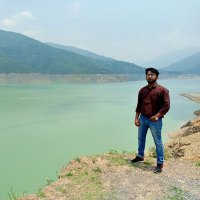

In [ ]:
avatar = driver.find_element(By.XPATH,'//div[@aria-label="Opens profile photo"]/img').get_attribute('src')

from IPython import display

display.Image(avatar)

Date of Birth



In [ ]:
dob = driver.find_element(By.XPATH,'//div[@data-testid="UserProfileHeader_Items"]/span[2]').text

dob


'Born May 5, 2001'

Place

In [ ]:
place = driver.find_element(By.XPATH,'//div[@data-testid="UserProfileHeader_Items"]/span[1]').text

place

'Bareilly, U.P'

 Total Media Uploads

In [ ]:
driver.find_element(By.LINK_TEXT,'Media').click()

mediaCount = driver.find_element(By.XPATH,'//div[@class="css-1dbjc4n r-1habvwh"]/div').text

mediaCount

'0 Photos & videos'

In [ ]:
driver.find_element(By.LINK_TEXT,'Likes').click()

likesCount = driver.find_element(By.XPATH,'//div[@class="css-1dbjc4n r-1habvwh"]/div').text

likesCount

'45 Likes'

In [ ]:
driver.find_element(By.LINK_TEXT,'Tweets').click()

tweetsCount = driver.find_element(By.XPATH,'//div[@class="css-1dbjc4n r-1habvwh"]/div').text

tweetsCount

'15 Tweets'

Total Following

In [ ]:
followingCount = driver.find_element(By.XPATH,'//a[@href="/akshay___sh/following"]/span/span').text

followingCount

'155'

Total Followers

In [ ]:
followerCount = driver.find_element(By.XPATH,'//a[@href="/akshay___sh/followers"]/span/span').text

followerCount

'14'

Tweets

In [ ]:
driver.find_element(By.LINK_TEXT,'Tweets').click()

tweetCards = driver.find_elements(By.XPATH,'//div[@data-testid="tweetText"]')

tweets = dict({})

count=1

for i in tweetCards:
  tweets.update({count:i.text})
  count = count + 1

print(tweets)

{1: 'Just got a text from a person who got a direct internship offer from Microsoft through engage, asking me which language to choose and how to study DSA.\n\nWhat the hell seriously!', 2: "Just wondering, we live in a society where a person with a great skill set is less valuable than who is pursuing http://b.tech, does a degree define a person's abilities?", 3: "Hola Hackers!!\nRegister now at: http://hackcbs.tech (in bio)\nMark your calendar for 29th - 31st October, 2021 for India's biggest student run hackathon. \nRevolutionize the digital Era with our digital hackathon!\n#hackCBS #mlh #elastic #hackathon #du #sscbs  #kronos #python", 4: "What is that one aspect of life  which may either be wonderful or cumbersome, always teaches us something? Any guesses?\nIt's EXPERIENCE !!\nTo give you some better insights of our mega event, we are launching the most awaited hackCBS diaries. So gear up fellas because it's here"}


In [ ]:
data = {'Name':name,
        'UserName':username,
        'Bio':bio,
        'Date of Birth':dob,
        'Place':place,
        'Profile Photo':avatar,
        'Total Media Uploads':mediaCount,
        'Total Likes':likesCount,
        'Total Tweets':tweetsCount,
        'Total Following':followingCount,
        'Total Followers':followerCount,
        'Tweets':tweets}

In [ ]:
import pandas as pd

temp = pd.DataFrame.from_dict(data,orient='index')

temp.to_csv('twitter.csv', index = True, encoding='utf-8')

In [ ]:
twitterData = pd.read_csv('/content/twitter.csv')
twitterData

,Unnamed: 0,0
0,Name,Akshay Sharmaᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠ
1,UserName,@akshay___sh
2,Bio,! Living The Reality !
3,Date of Birth,"Born May 5, 2001"
4,Place,"Bareilly, U.P"
5,Profile Photo,https://pbs.twimg.com/profile_images/143685375...
6,Total Media Uploads,0 Photos & videos
7,Total Likes,45 Likes
8,Total Tweets,15 Tweets
9,Total Following,155
